## EDA

In [1]:
#importing necessary libraries for exploring the dataset
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the data into the variable 'df'
df = pd.read_csv("solarpowergeneration.csv")
df.head(10)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0


In [3]:
print(df.index)

RangeIndex(start=0, stop=2920, step=1)


In [4]:
df.info() # checking the structure and types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
df[df.duplicated(keep = False)] #so there are no duplicates in this dataset

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated


In [6]:
df['sky-cover'].value_counts()

sky-cover
1    776
4    598
3    580
0    518
2    448
Name: count, dtype: int64

In [7]:
df.isnull().sum() #so there is one null in 'average-wind-speed-(period)' column

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

Text(0.5, 1.0, 'Visualization of missing values in the dataset')

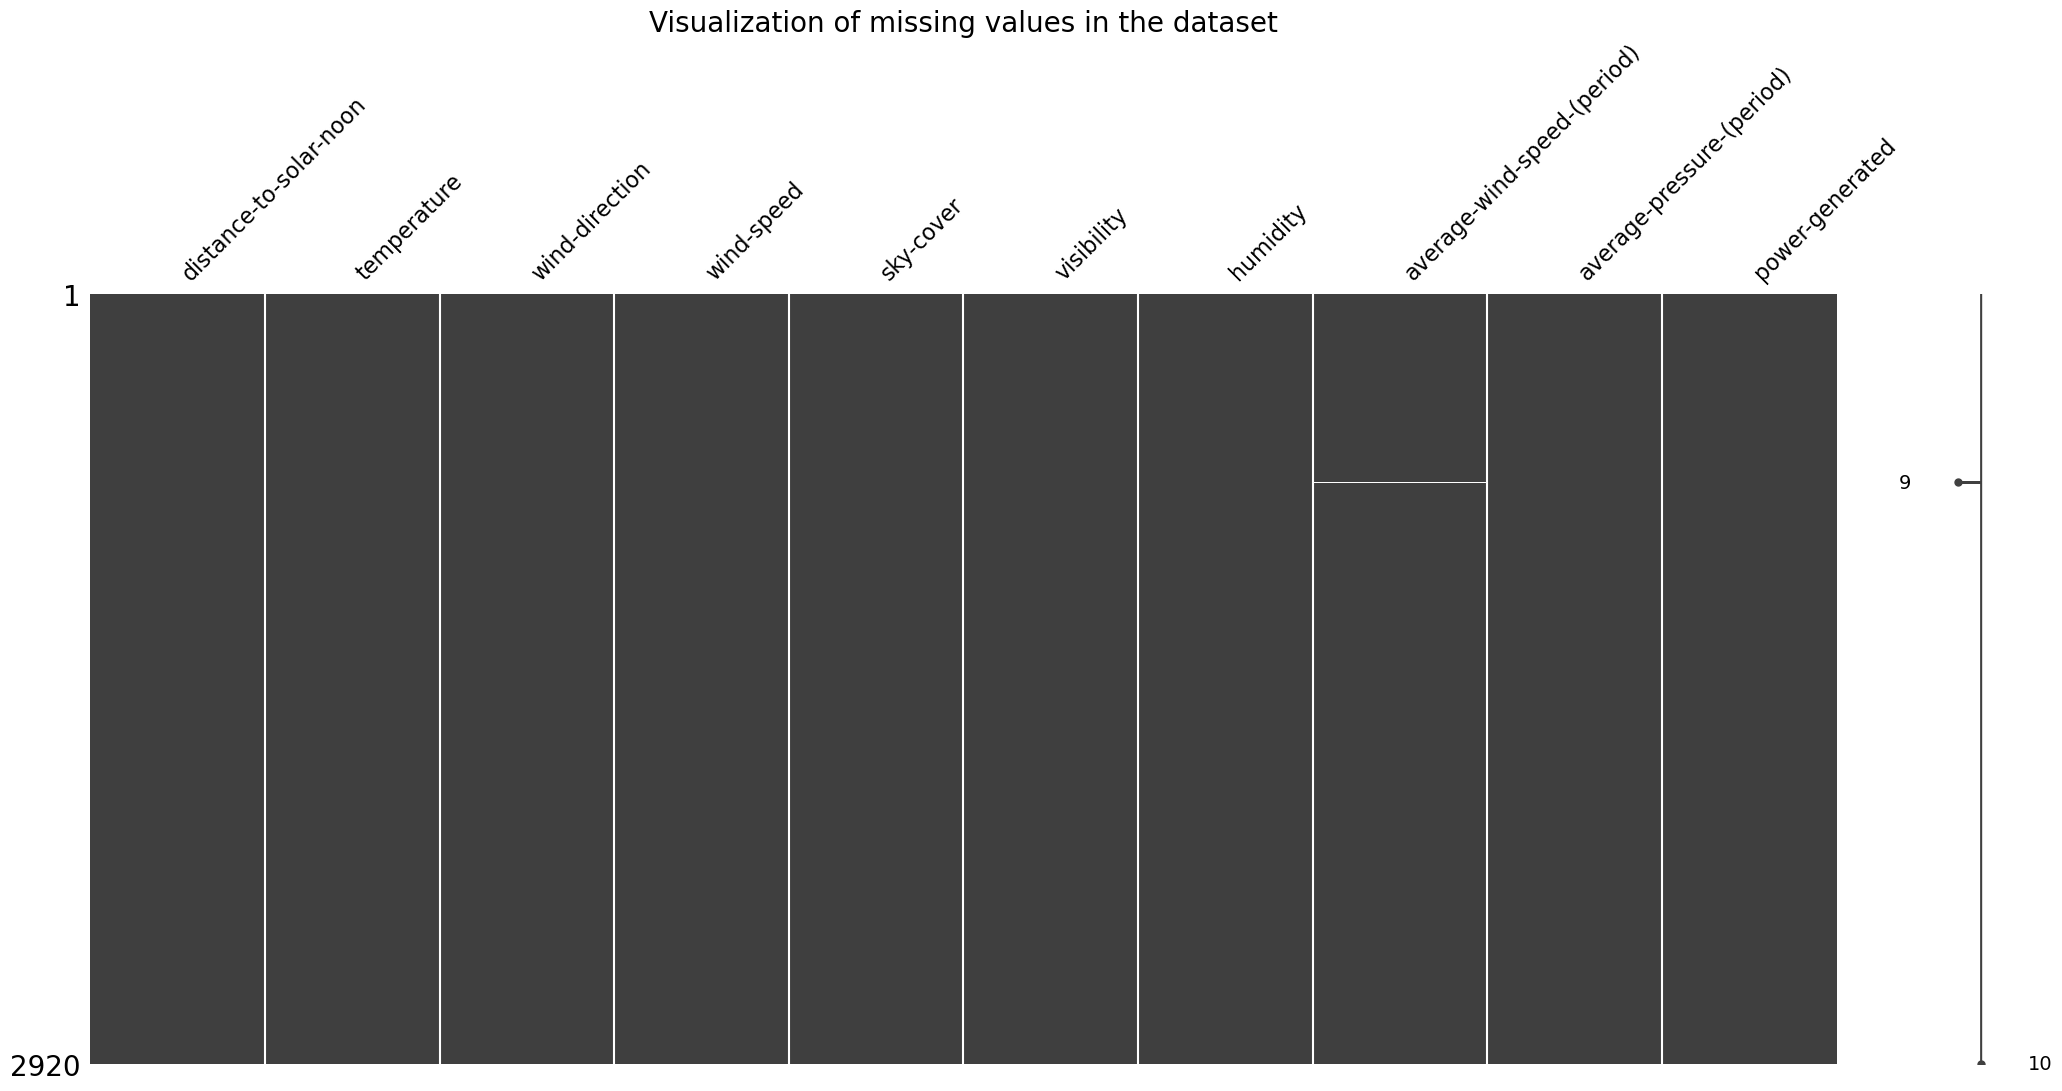

In [8]:
import missingno as msno
msno.matrix(df)
plt.title("Visualization of missing values in the dataset", fontsize = 20)

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df["average-wind-speed-(period)"] = imputer.fit_transform(df[["average-wind-speed-(period)"]])

In [10]:
# Check the result
print(df.isnull().sum()) #now there are no null values in the dataset

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance-to-solar-noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
temperature,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
wind-direction,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
wind-speed,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky-cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
humidity,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
average-wind-speed-(period),2920.0,10.128767,7.260333,0.000000,5.000000,9.000000,15.000000,40.000000
average-pressure-(period),2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power-generated,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


In [12]:
skewness = df.skew()
skewness

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623168
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64

C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\405034321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')


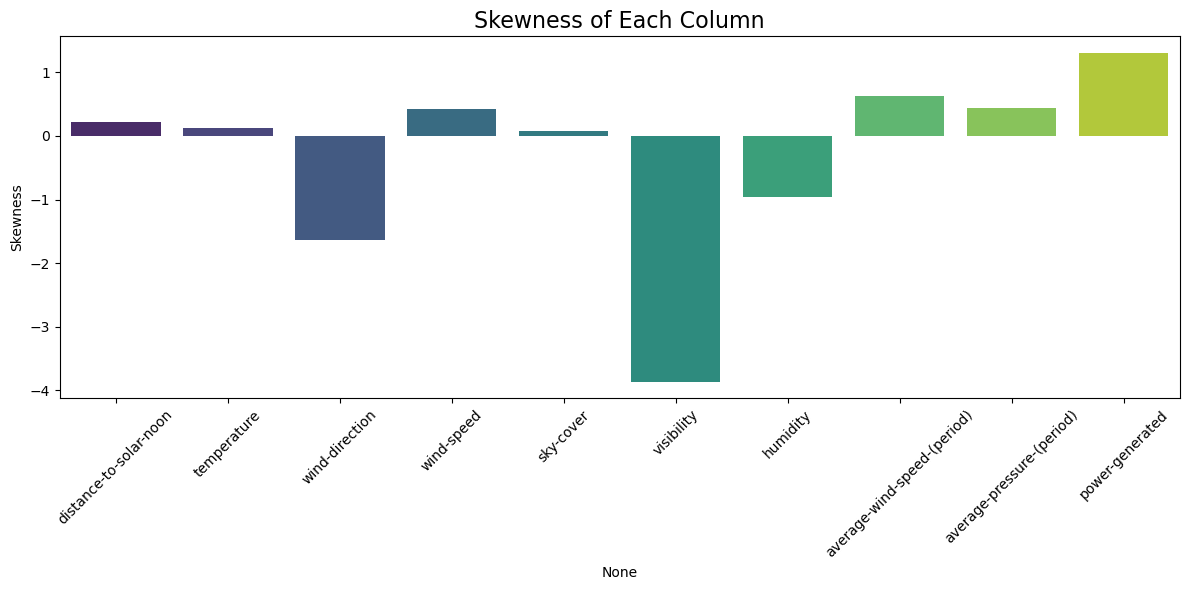

In [13]:
# Plot skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Each Column', fontsize=16)
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation
#### Skewness Plot: This plot shows the skewness value for each column, indicating the asymmetry of the distribution. Positive values suggest right-skewed distributions, while negative values suggest left-skewed distributions.

In [14]:
kurt = df.kurt()
kurt

distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.016458
average-pressure-(period)       0.352309
power-generated                 0.342206
dtype: float64

C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\3603965179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurt.index, y=kurt.values, palette='viridis')


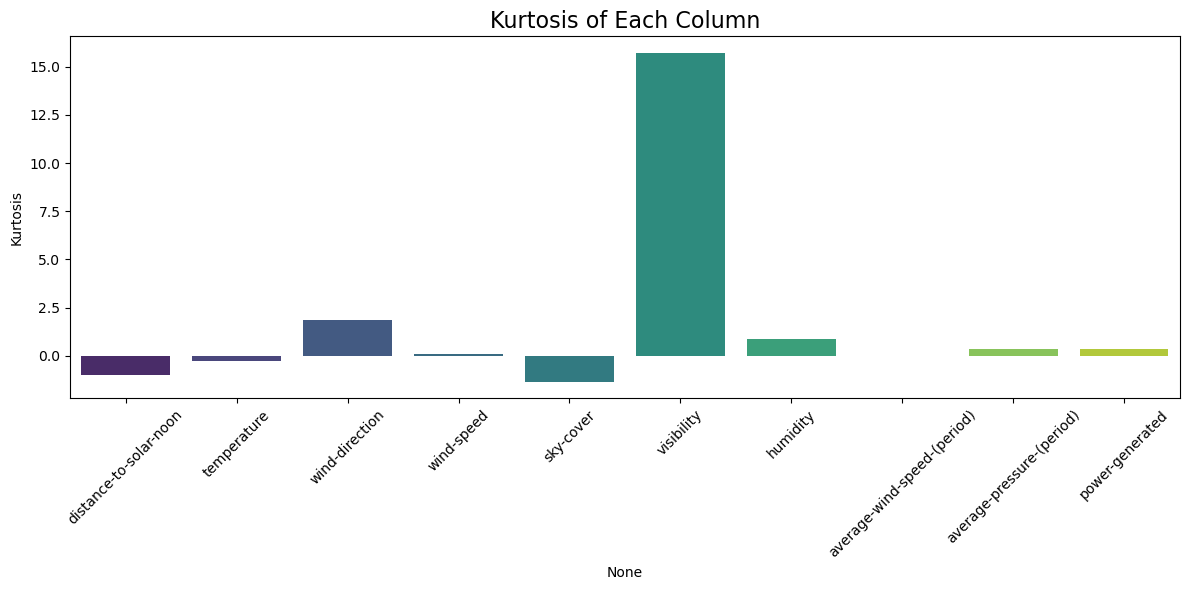

In [15]:
# Plot kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(x=kurt.index, y=kurt.values, palette='viridis')
plt.title('Kurtosis of Each Column', fontsize=16)
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation
#### Kurtosis Plot: This plot shows the kurtosis value for each column, indicating the "tailedness" of the distribution. Positive values indicate heavier tails (leptokurtic), while negative values indicate lighter tails (platykurtic).

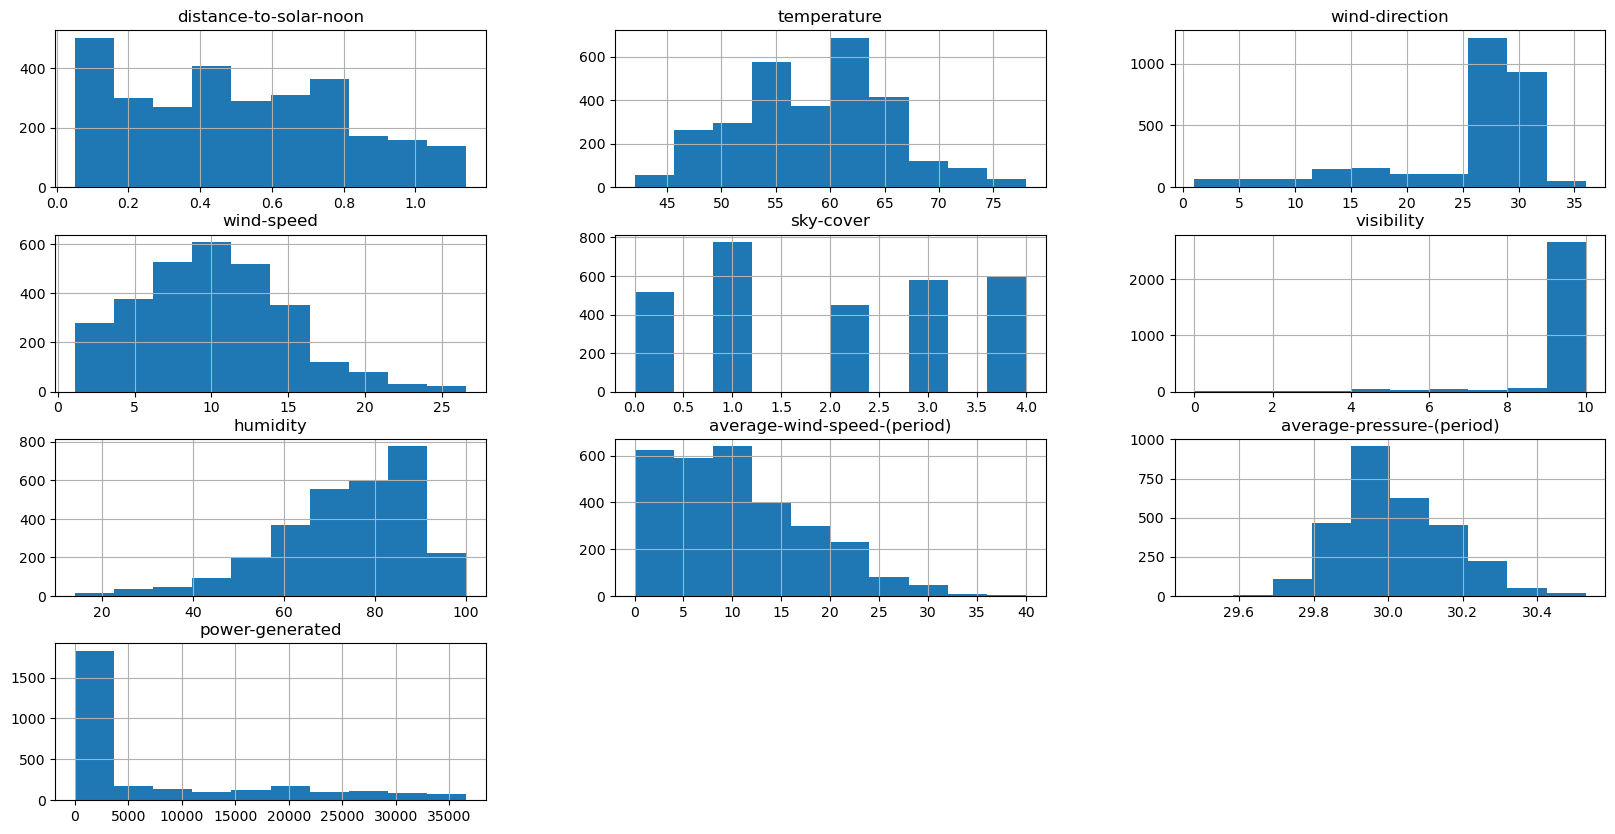

In [16]:
df.hist(figsize=(20, 10))
plt.show()

### Explanation
#### Histograms are essential for understanding the distribution, central tendency, and variability of data. Identifies Patterns i.e. reveals the shape of the data distribution, such as normal, skewed, or multimodal distributions.


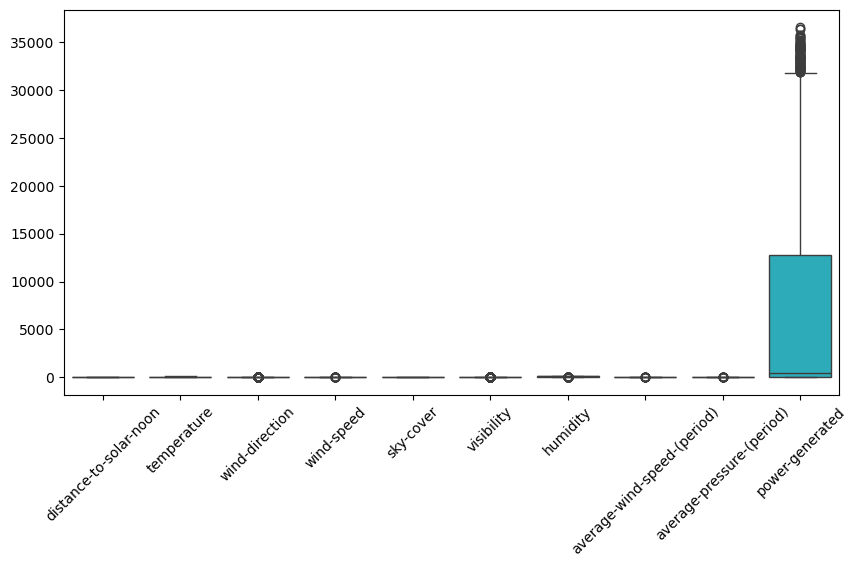

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### Explanation
#### Boxplots: Visualize the distribution of each column and identify outliers. Points outside the whiskers are considered outliers.

In [18]:
# Calculate correlation matrix
corr_matrix = df.corr()

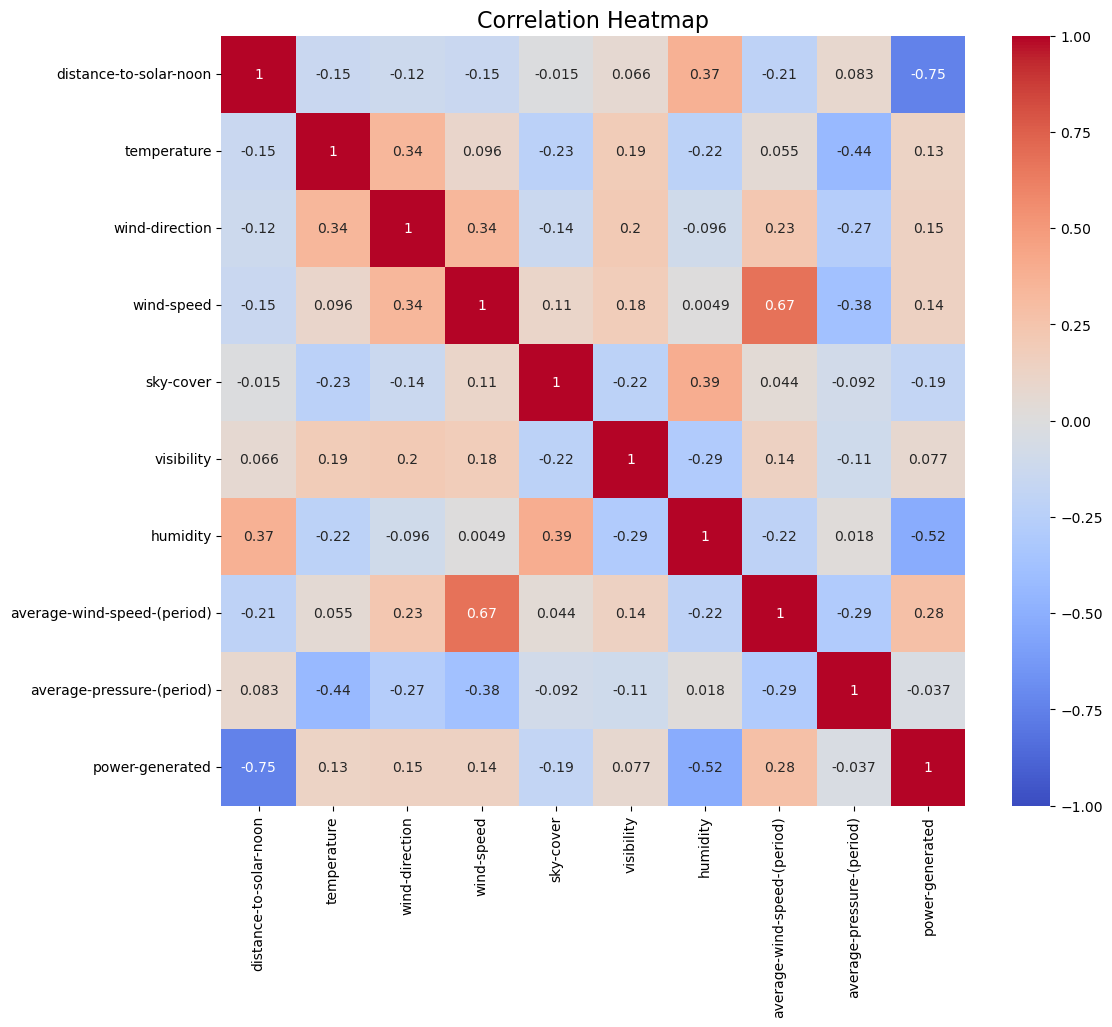

In [19]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Univariate Analysis

In [20]:
#defining a function for univarite analysis
def univariate_analysis(df, column):
    print(f"Analyzing column: {column}\n")

    #Summary statistics
    print(df[column].describe())

    #Skewness and Kurtosis
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    

    #Histogram with KDE
    plt.figure(figsize=(14,6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column} with KDE')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}\n")

    #Boxplot
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

    #Check for outliers using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR = Q3-Q1
    outliers = df[(df[column]<(Q1-1.5 * IQR))| (df[column] > (Q3 +1.5*IQR))]
    print(f"Number of Outliers detected : {len(outliers)}\n")

    
    

In [21]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

Analyzing column: distance-to-solar-noon

count    2920.000000
mean        0.503294
std         0.298024
min         0.050401
25%         0.243714
50%         0.478957
75%         0.739528
max         1.141361
Name: distance-to-solar-noon, dtype: float64


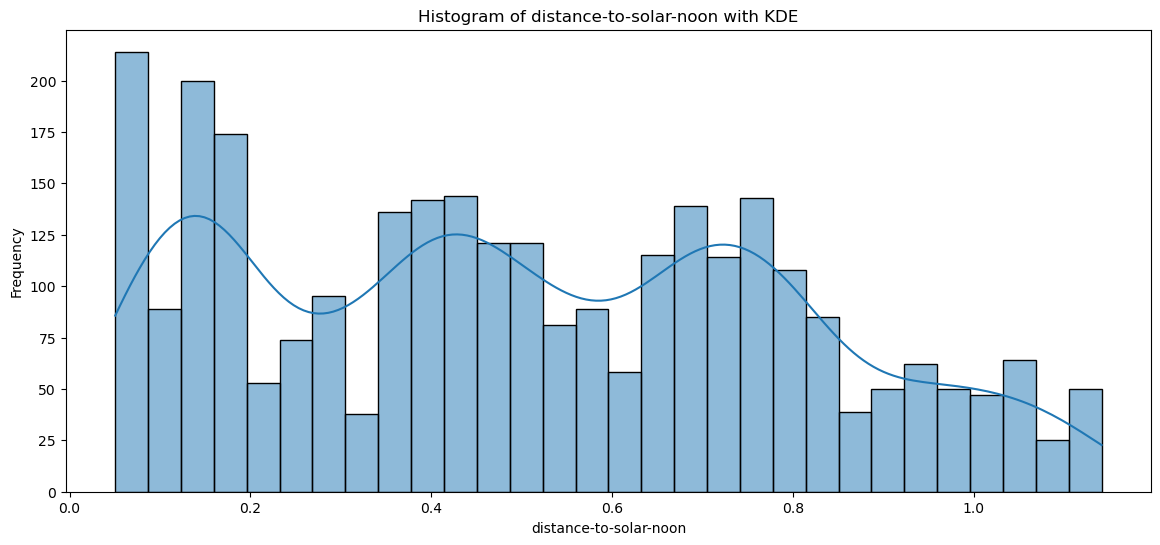

Skewness: 0.21145184337509115
Kurtosis: -0.9873059456043718



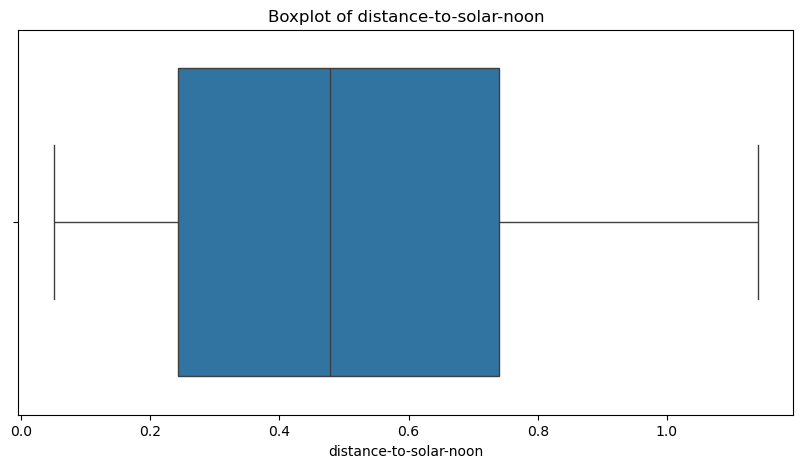

Number of Outliers detected : 0



In [22]:
univariate_analysis(df, 'distance-to-solar-noon')


Analyzing column: temperature

count    2920.000000
mean       58.468493
std         6.841200
min        42.000000
25%        53.000000
50%        59.000000
75%        63.000000
max        78.000000
Name: temperature, dtype: float64


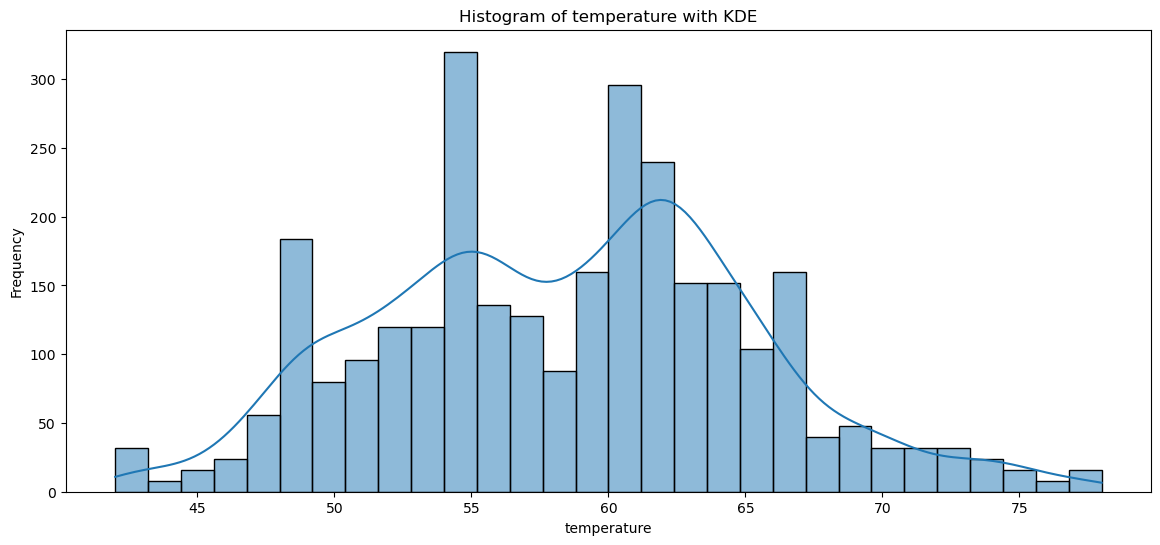

Skewness: 0.12591612509452638
Kurtosis: -0.28740217999449547



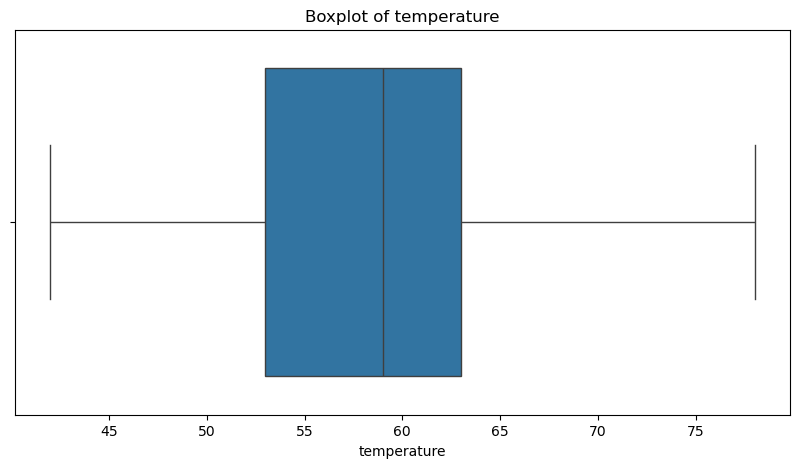

Number of Outliers detected : 0



In [23]:
univariate_analysis(df, 'temperature')

Analyzing column: wind-direction

count    2920.000000
mean       24.953425
std         6.915178
min         1.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: wind-direction, dtype: float64


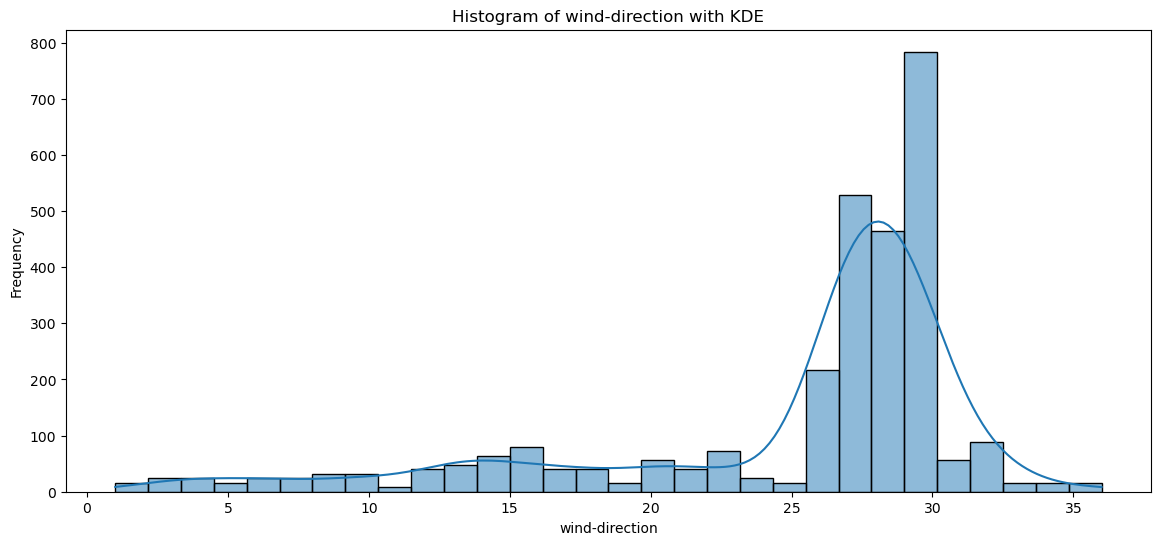

Skewness: -1.6295192356486814
Kurtosis: 1.8566216990614794



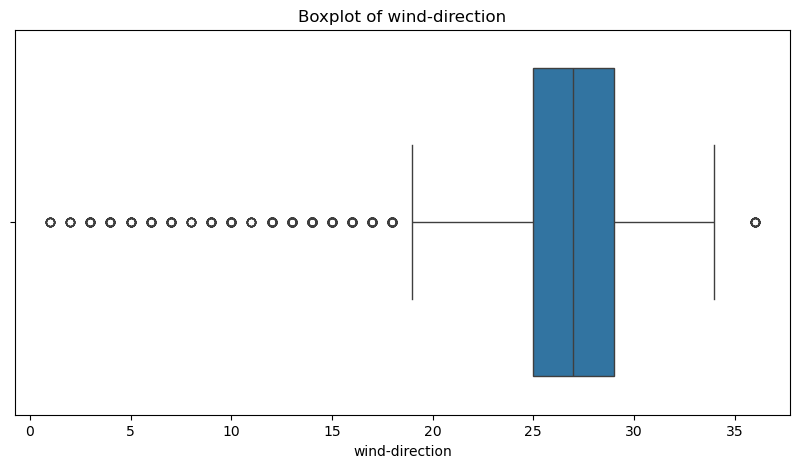

Number of Outliers detected : 528



In [24]:
univariate_analysis(df, 'wind-direction' )

Analyzing column: wind-speed

count    2920.000000
mean       10.096986
std         4.838185
min         1.100000
25%         6.600000
50%        10.000000
75%        13.100000
max        26.600000
Name: wind-speed, dtype: float64


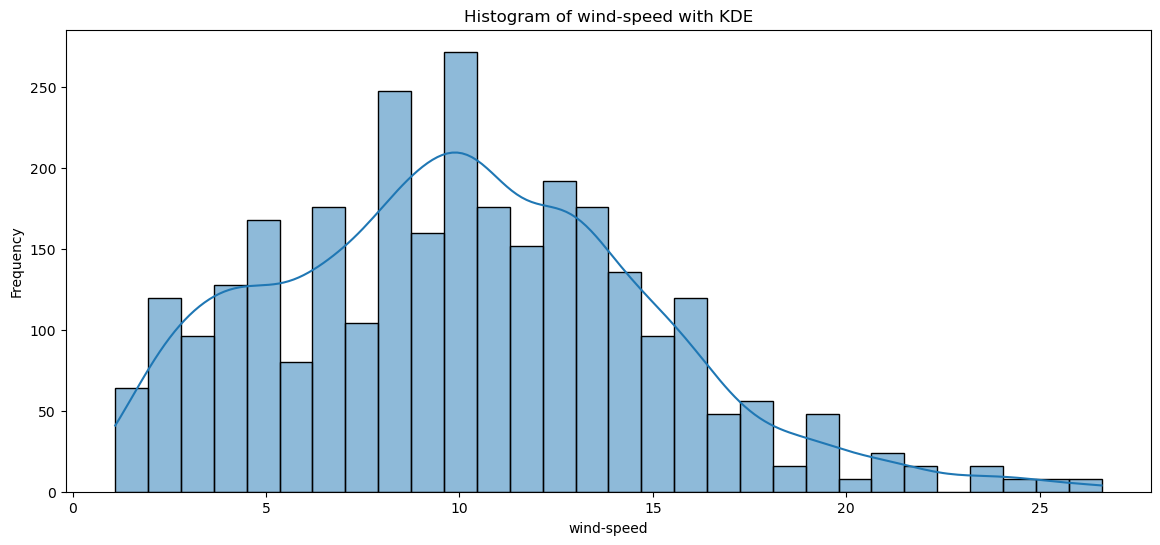

Skewness: 0.41685132886363285
Kurtosis: 0.07860570584122595



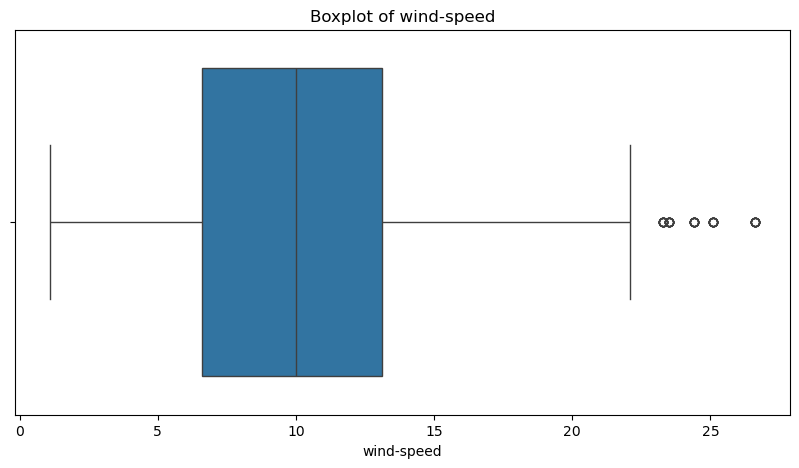

Number of Outliers detected : 40



In [25]:
univariate_analysis(df, 'wind-speed' )

Analyzing column: sky-cover

count    2920.000000
mean        1.987671
std         1.411978
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: sky-cover, dtype: float64


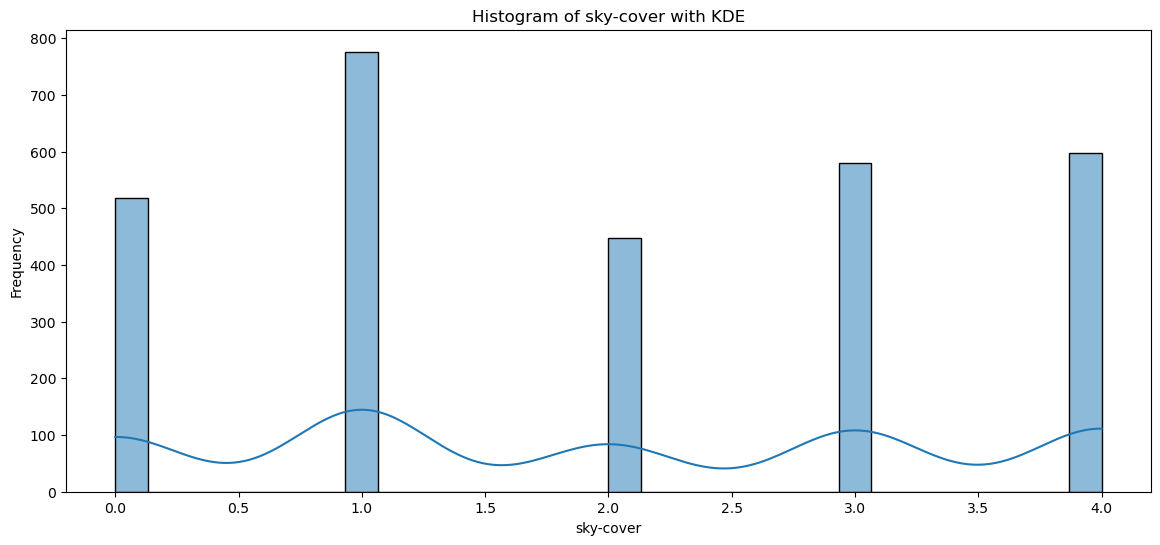

Skewness: 0.08028409435277804
Kurtosis: -1.3414563947095484



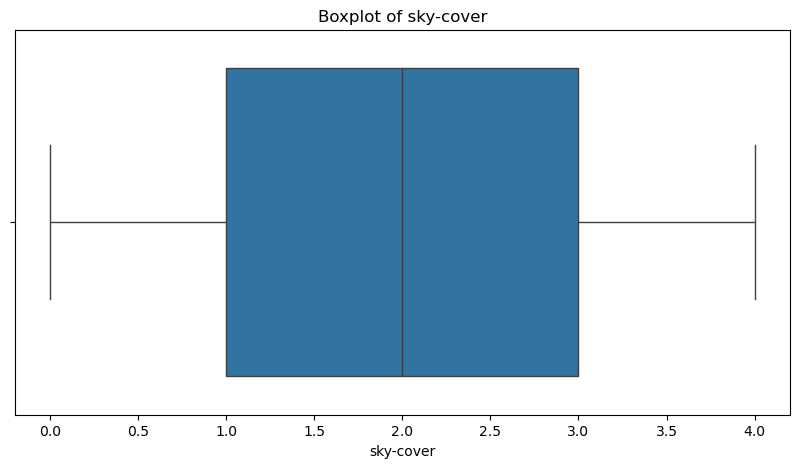

Number of Outliers detected : 0



In [26]:
univariate_analysis(df, 'sky-cover')

Analyzing column: visibility

count    2920.000000
mean        9.557705
std         1.383884
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: visibility, dtype: float64


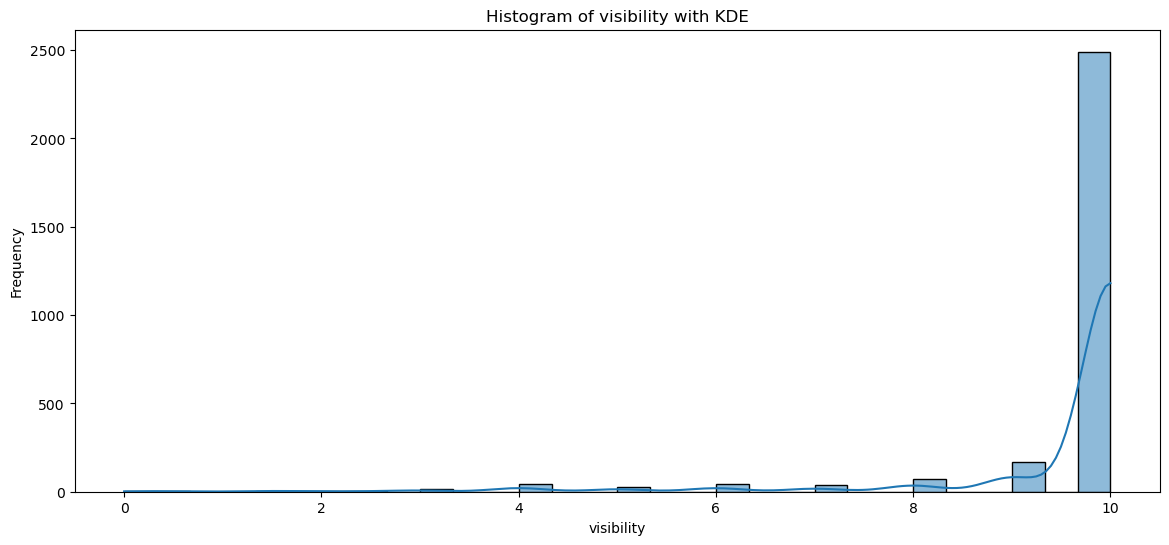

Skewness: -3.862446222918068
Kurtosis: 15.718493977663936



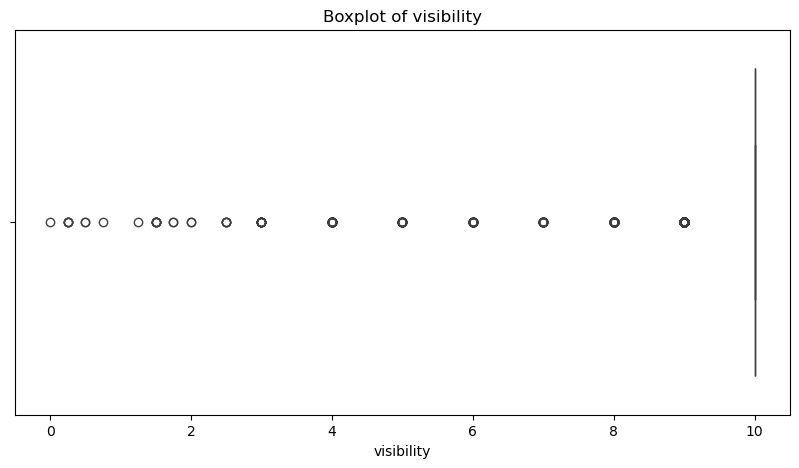

Number of Outliers detected : 429



In [27]:
univariate_analysis(df,'visibility' )

Analyzing column: humidity

count    2920.000000
mean       73.513699
std        15.077139
min        14.000000
25%        65.000000
50%        77.000000
75%        84.000000
max       100.000000
Name: humidity, dtype: float64


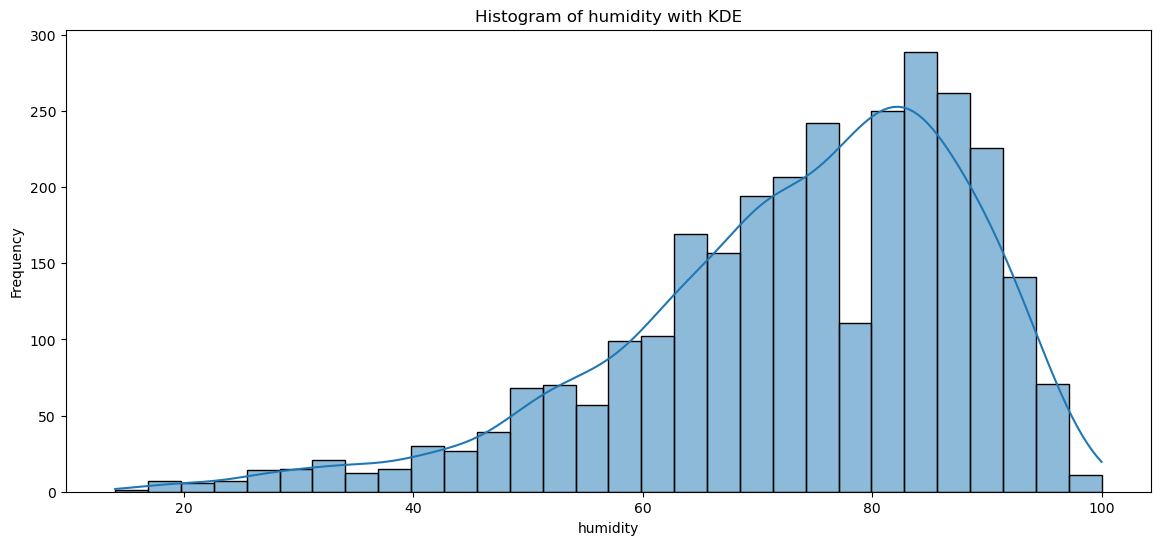

Skewness: -0.9556072100798612
Kurtosis: 0.8722189941269396



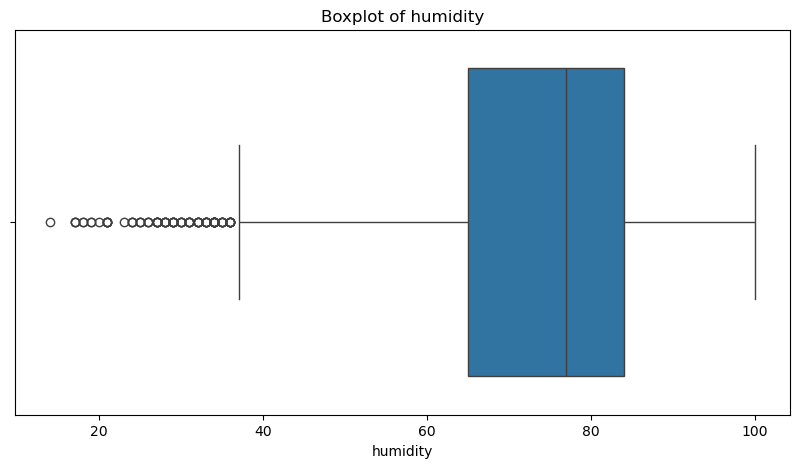

Number of Outliers detected : 83



In [28]:
univariate_analysis(df, 'humidity' )

Analyzing column: average-wind-speed-(period)

count    2920.000000
mean       10.128767
std         7.260333
min         0.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        40.000000
Name: average-wind-speed-(period), dtype: float64


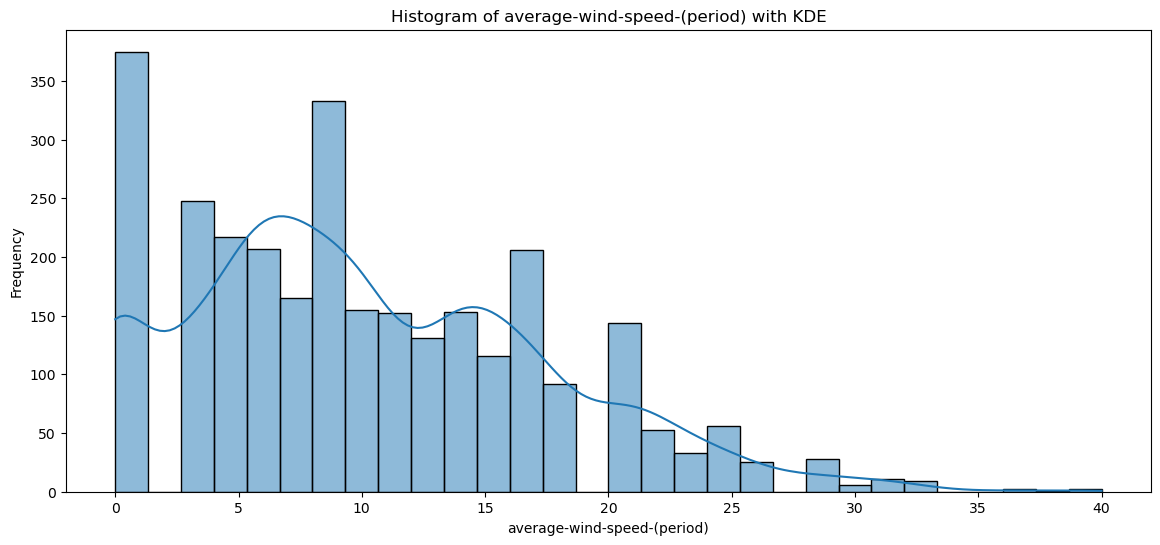

Skewness: 0.6231677856022435
Kurtosis: 0.0164579665440856



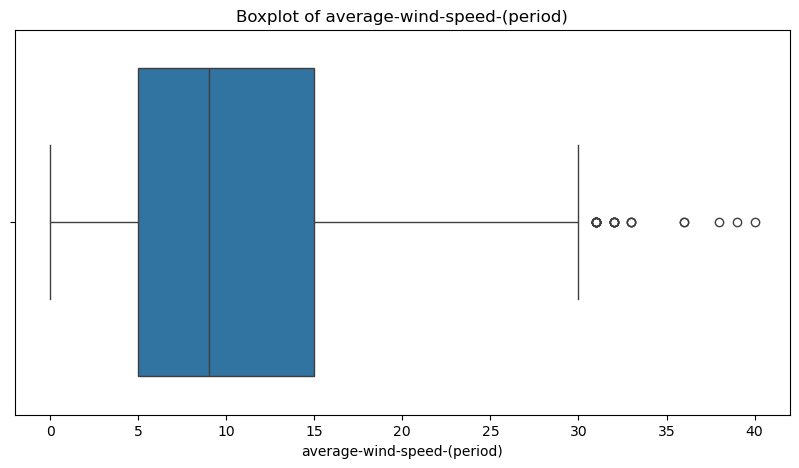

Number of Outliers detected : 25



In [29]:
univariate_analysis(df,'average-wind-speed-(period)')

Analyzing column: average-pressure-(period)

count    2920.000000
mean       30.017760
std         0.142006
min        29.480000
25%        29.920000
50%        30.000000
75%        30.110000
max        30.530000
Name: average-pressure-(period), dtype: float64


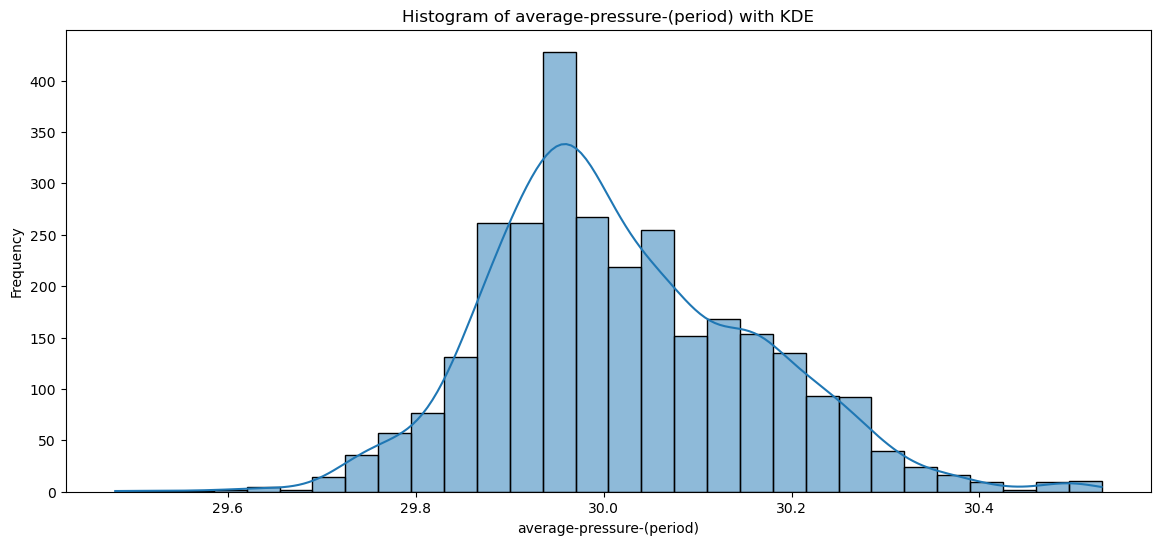

Skewness: 0.44138375067254937
Kurtosis: 0.35230933380857143



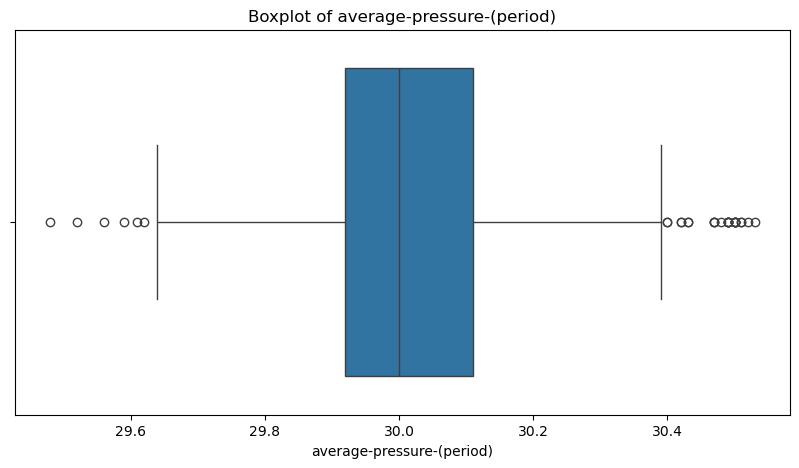

Number of Outliers detected : 31



In [30]:
univariate_analysis(df,'average-pressure-(period)')

Analyzing column: power-generated

count     2920.000000
mean      6979.846233
std      10312.336413
min          0.000000
25%          0.000000
50%        404.000000
75%      12723.500000
max      36580.000000
Name: power-generated, dtype: float64


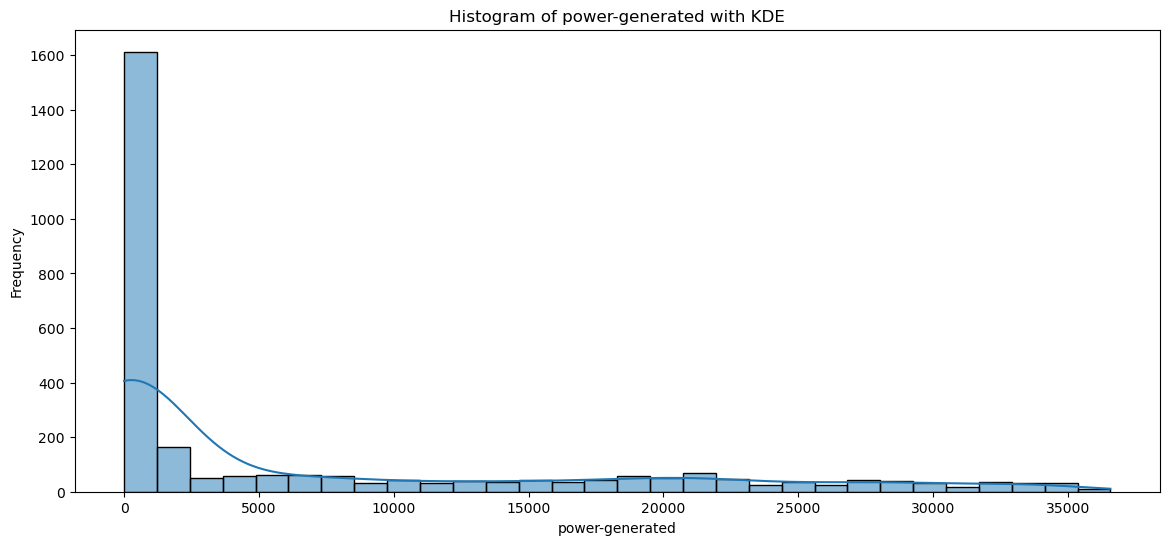

Skewness: 1.3070350643796376
Kurtosis: 0.3422061207741227



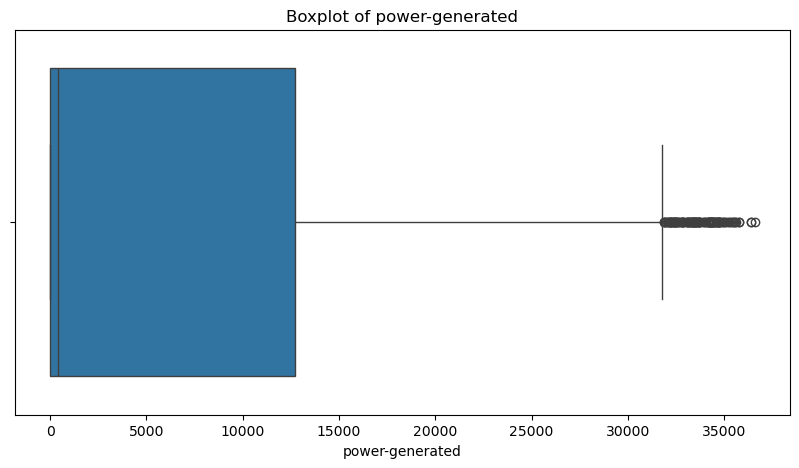

Number of Outliers detected : 107



In [31]:
univariate_analysis(df,  'power-generated')

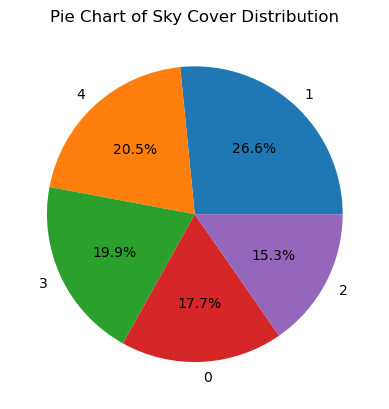

In [32]:
plt.pie(df['sky-cover'].value_counts(), labels=df['sky-cover'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Sky Cover Distribution')
plt.show()

## Bivariate analysis

In [33]:
#Defining the bivariate analysis function
def bivariate_analysis(df, feature, target = 'power-generated'):

    
    #Scatter plots, correlation, and regression lines for each feature against the target
    print(f"Analyzing relationship between {feature} and {target}\n")

    #correlation coefficient
    correlation = df[feature].corr(df[target])
    print(f"correlation between {feature} and {target}: {correlation}\n")

    #Regression Line
    plt.figure(figsize=(14,6))
    sns.regplot(x=df[feature], y=df[target], scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'Regression Line: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

    # Create a jointplot for two variables with scatter plot and KDE marginals
    plt.figure(figsize=(14,6))
    sns.jointplot(x=df[feature], y=df[target], data=df, kind='scatter')
    sns.kdeplot(x=df[feature], y=df[target], data=df, fill=True, color='blue', alpha=0.3)
    plt.suptitle(f"Jointplot of {feature} vs {target}", y=1.02)
    plt.show()

##### Adding a regression line to a scatter plot helps visualize the relationship between two variables by showing the best-fit line through the data points. It highlights the trend, indicating whether the relationship is positive, negative, or non-existent, and helps in understanding the strength and direction of the association between the variables.

##### A joint plot is used to visualize the relationship between two variables, showing both their individual distributions and their correlation. It provides a combined view of a scatter plot and histograms (or KDE plots), making it useful for identifying patterns, trends, and potential outliers in the data.


#### The regression line in a scatterplot indicates the relationship between two variables. 
##### Direction:

##### Positive Slope: If the line slopes upwards from left to right, it indicates a positive correlation, meaning as the independent variable (X) increases, the dependent variable (Y) also increases.

##### Negative Slope: If the line slopes downwards, it indicates a negative correlation, meaning as X increases, Y decreases.

Analyzing relationship between distance-to-solar-noon and power-generated

correlation between distance-to-solar-noon and power-generated: -0.7466813768914984



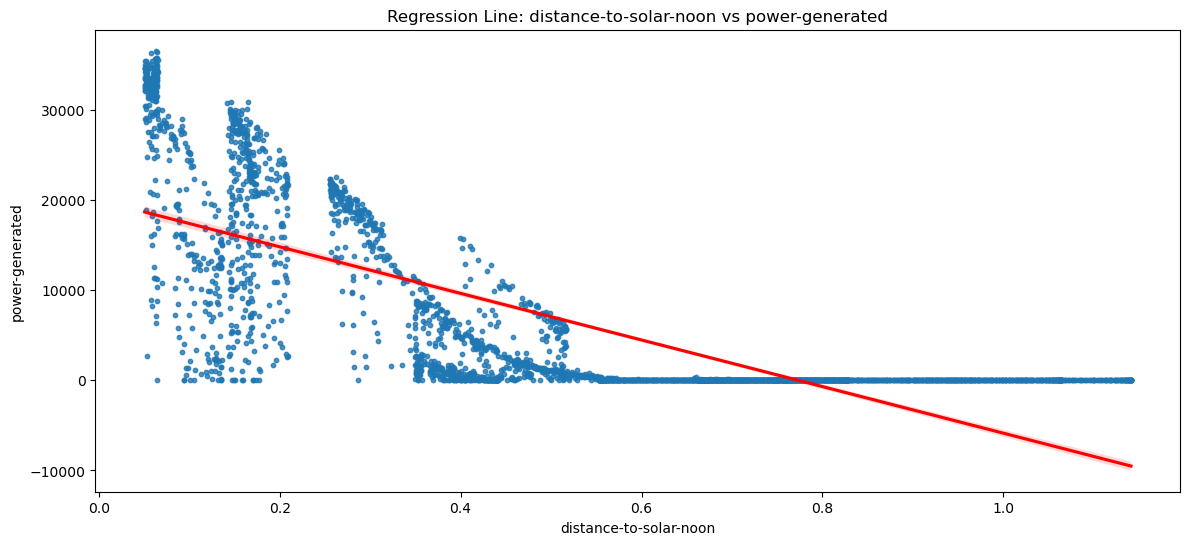

<Figure size 1400x600 with 0 Axes>

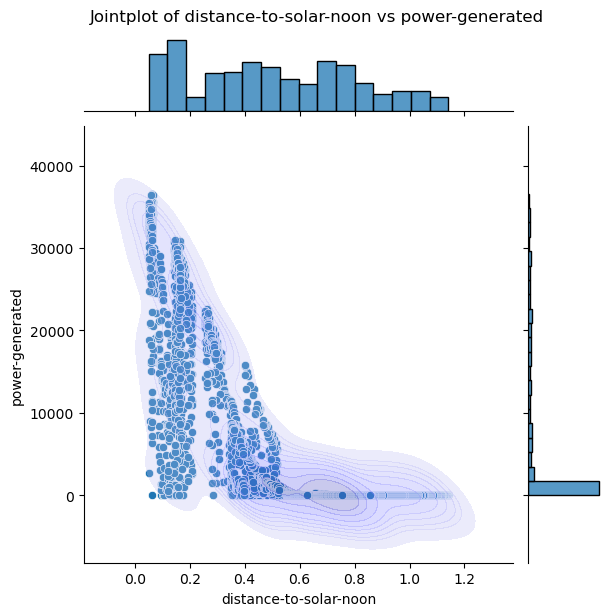

In [34]:
bivariate_analysis(df,'distance-to-solar-noon' )

Analyzing relationship between temperature and power-generated

correlation between temperature and power-generated: 0.13219298661649365



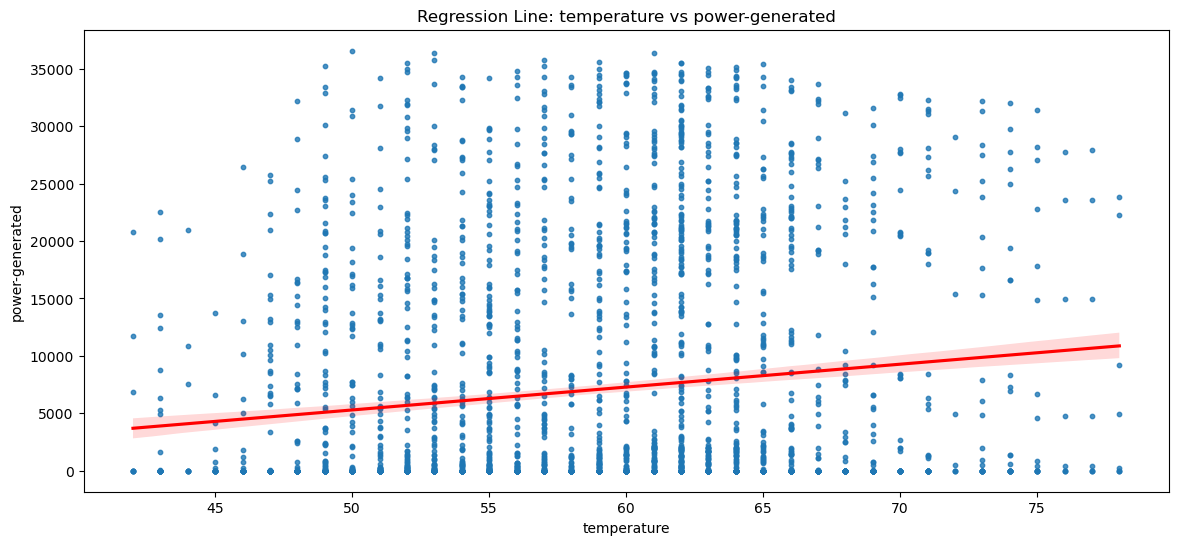

<Figure size 1400x600 with 0 Axes>

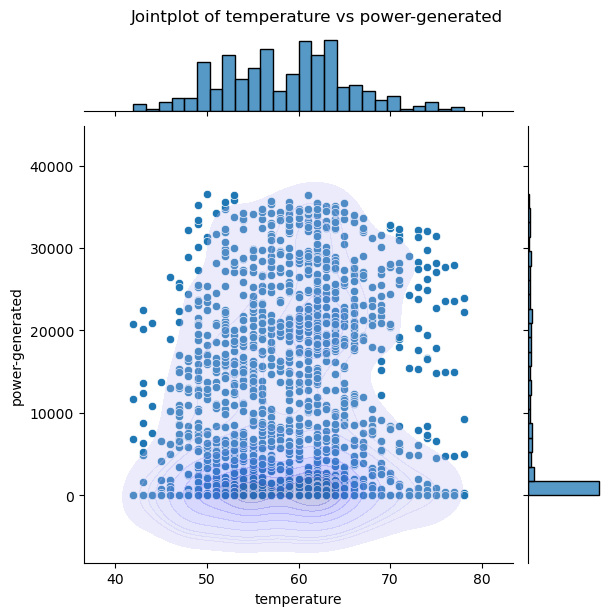

In [35]:
bivariate_analysis(df,'temperature')

Analyzing relationship between wind-direction and power-generated

correlation between wind-direction and power-generated: 0.1467881458794033



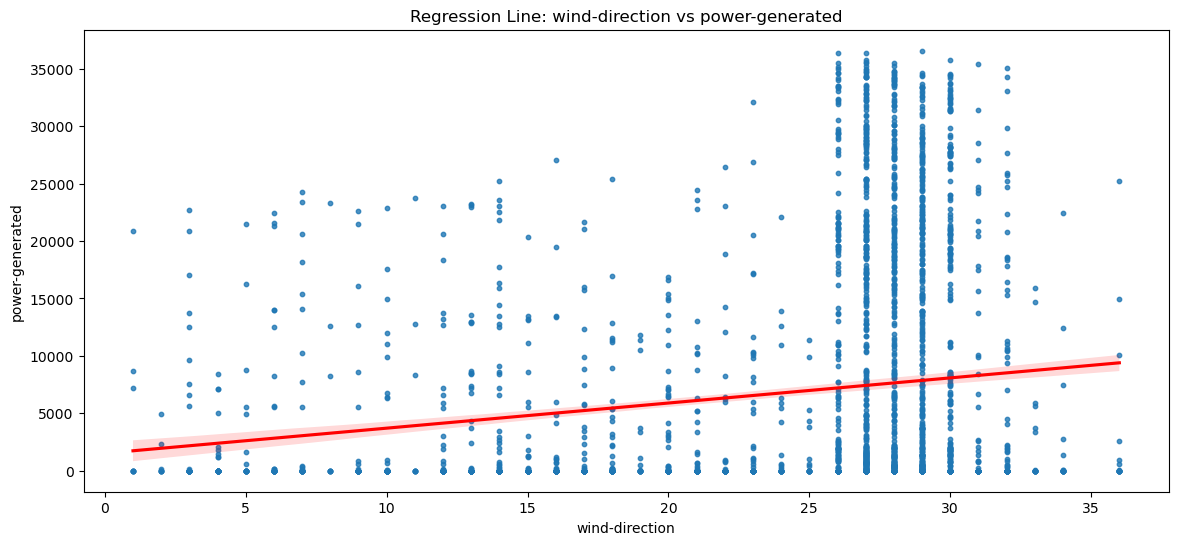

<Figure size 1400x600 with 0 Axes>

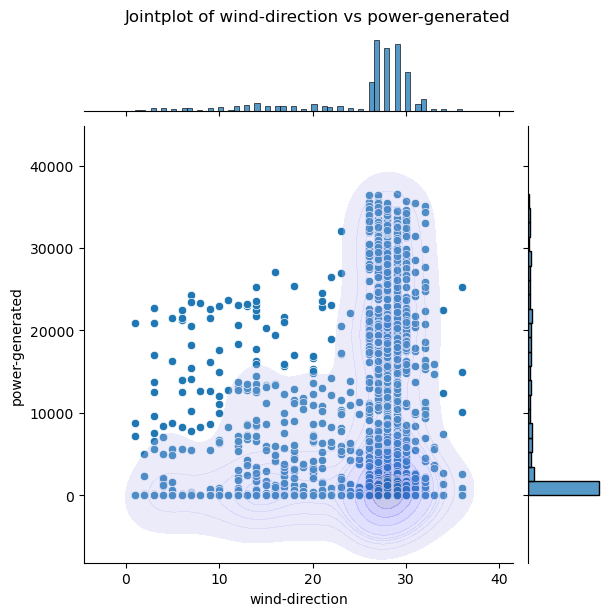

In [36]:
bivariate_analysis(df,'wind-direction')

Analyzing relationship between wind-speed and power-generated

correlation between wind-speed and power-generated: 0.142641324726295



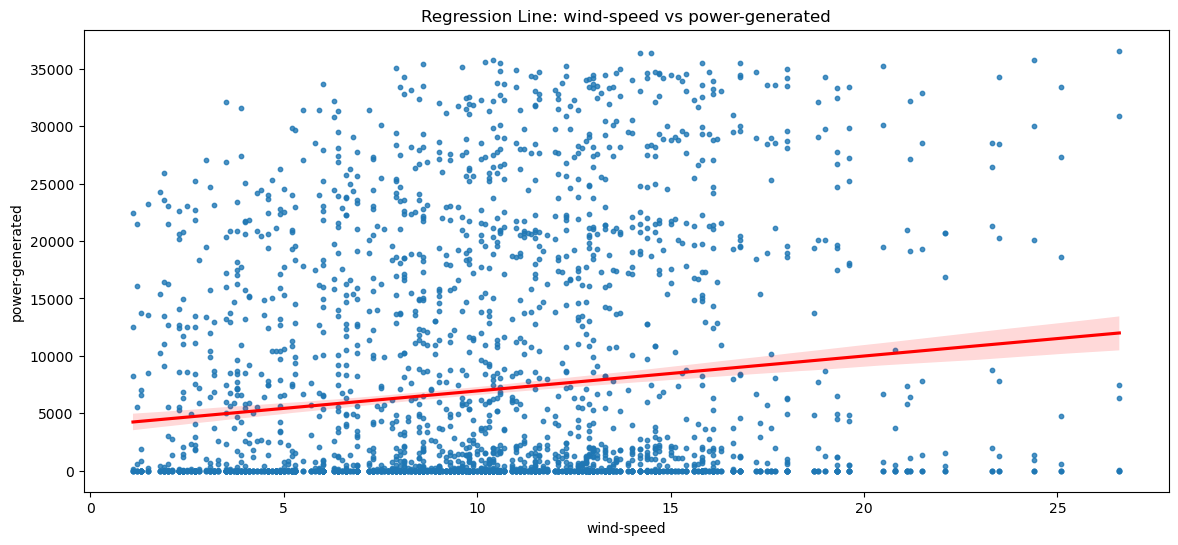

<Figure size 1400x600 with 0 Axes>

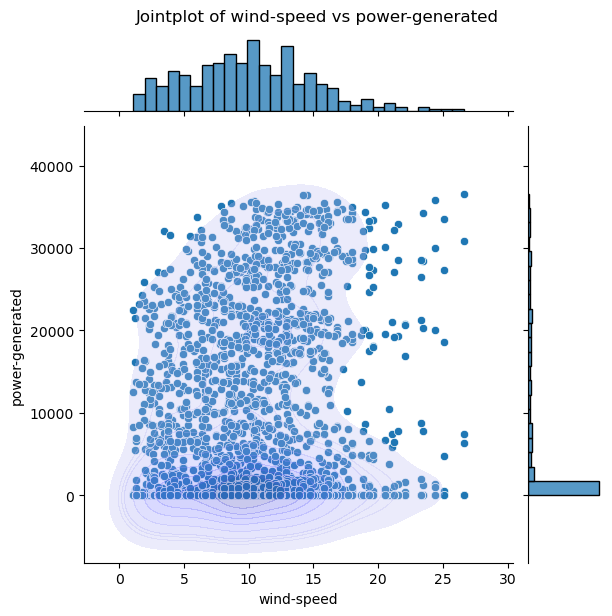

In [37]:
bivariate_analysis(df,'wind-speed')

Analyzing relationship between sky-cover and power-generated

correlation between sky-cover and power-generated: -0.18723601411090263



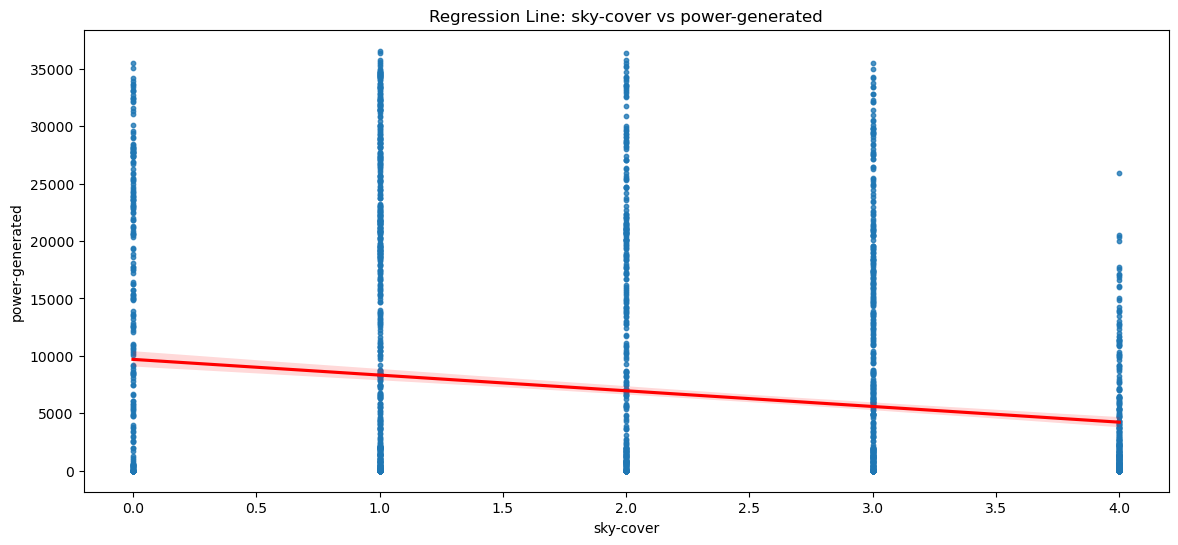

<Figure size 1400x600 with 0 Axes>

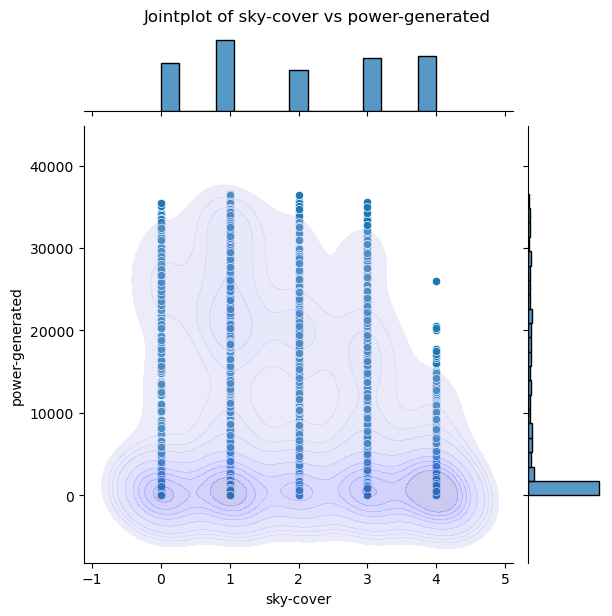

In [38]:
bivariate_analysis(df,'sky-cover')

Analyzing relationship between visibility and power-generated

correlation between visibility and power-generated: 0.07653598455898163



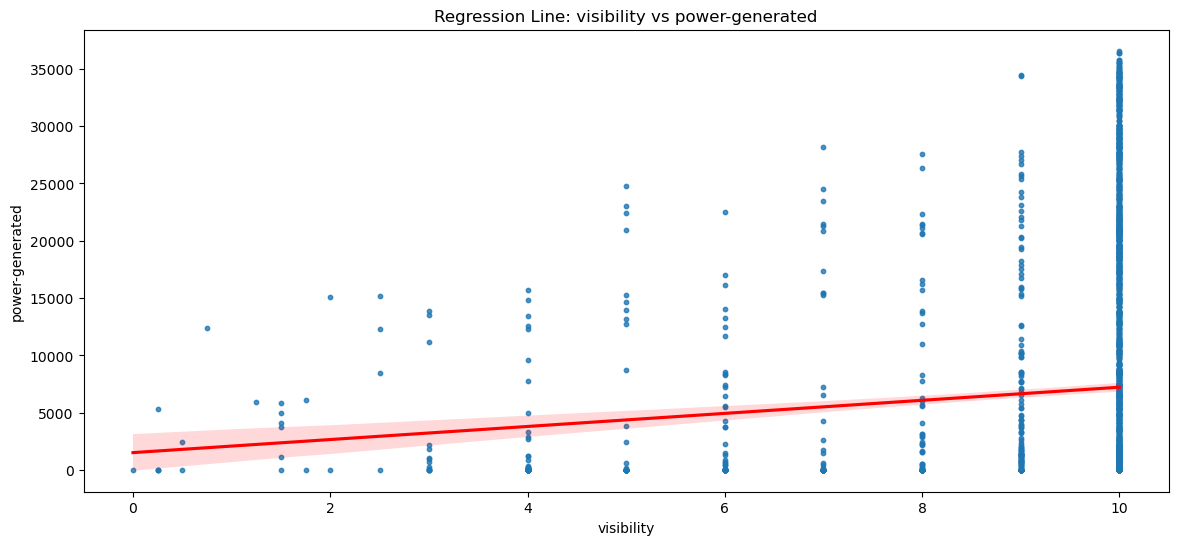

<Figure size 1400x600 with 0 Axes>

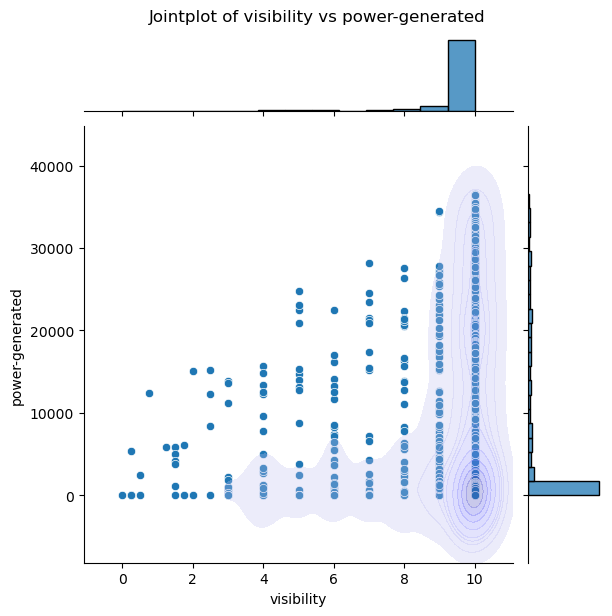

In [39]:
bivariate_analysis(df,'visibility')

Analyzing relationship between humidity and power-generated

correlation between humidity and power-generated: -0.52254508863553



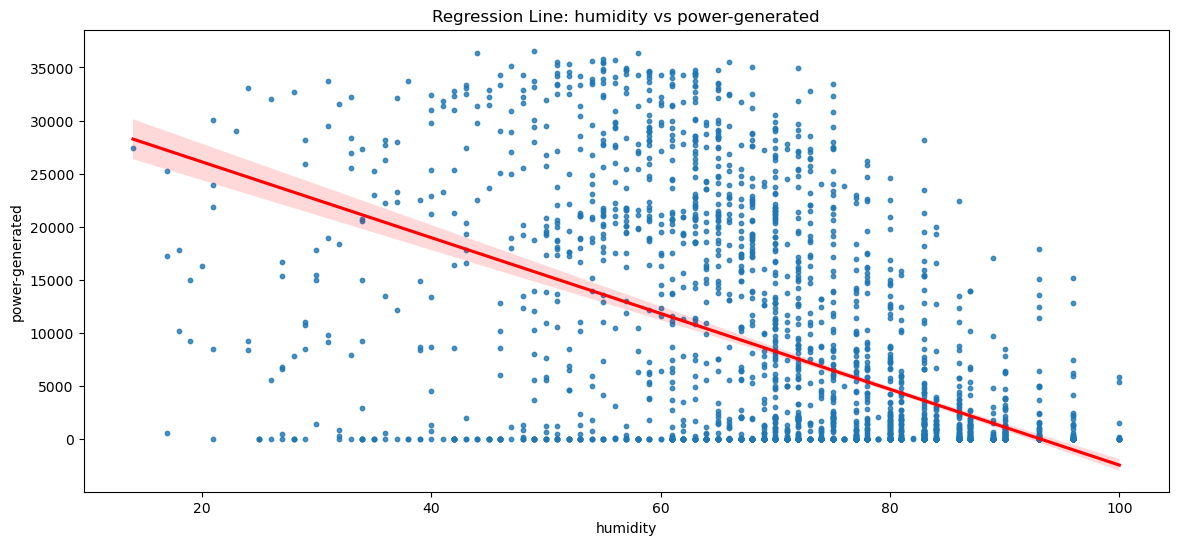

<Figure size 1400x600 with 0 Axes>

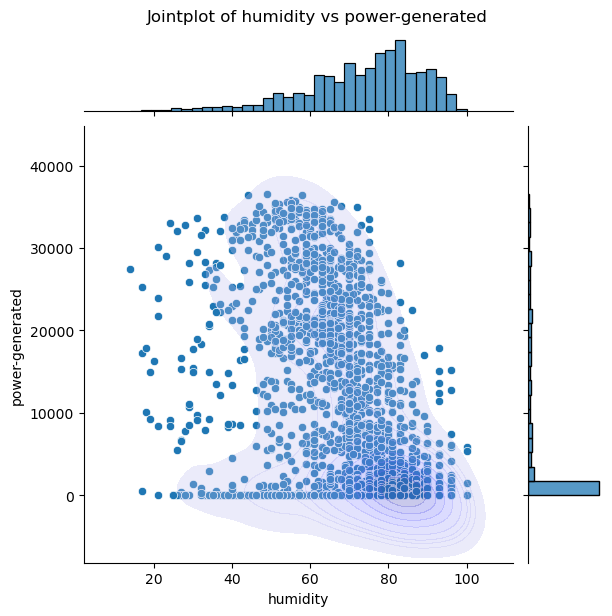

In [40]:
bivariate_analysis(df,'humidity')

Analyzing relationship between average-wind-speed-(period) and power-generated

correlation between average-wind-speed-(period) and power-generated: 0.27818765132408946



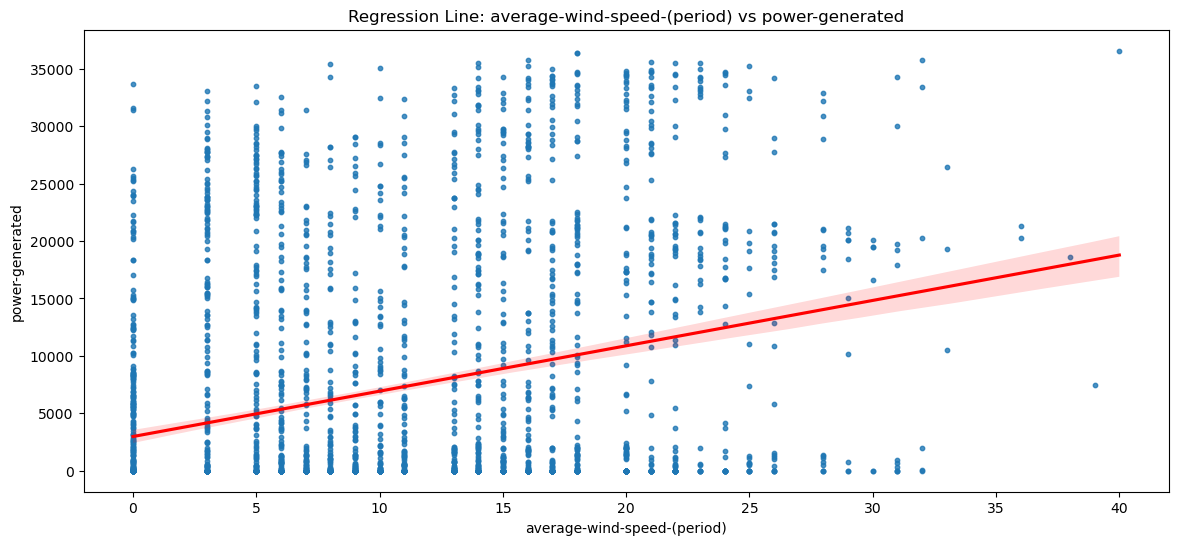

<Figure size 1400x600 with 0 Axes>

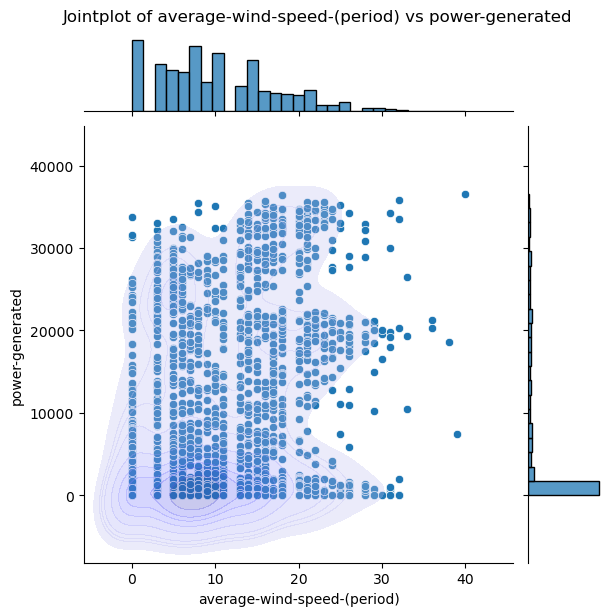

In [41]:
bivariate_analysis(df,'average-wind-speed-(period)')

Analyzing relationship between average-pressure-(period) and power-generated

correlation between average-pressure-(period) and power-generated: -0.036770789837345885



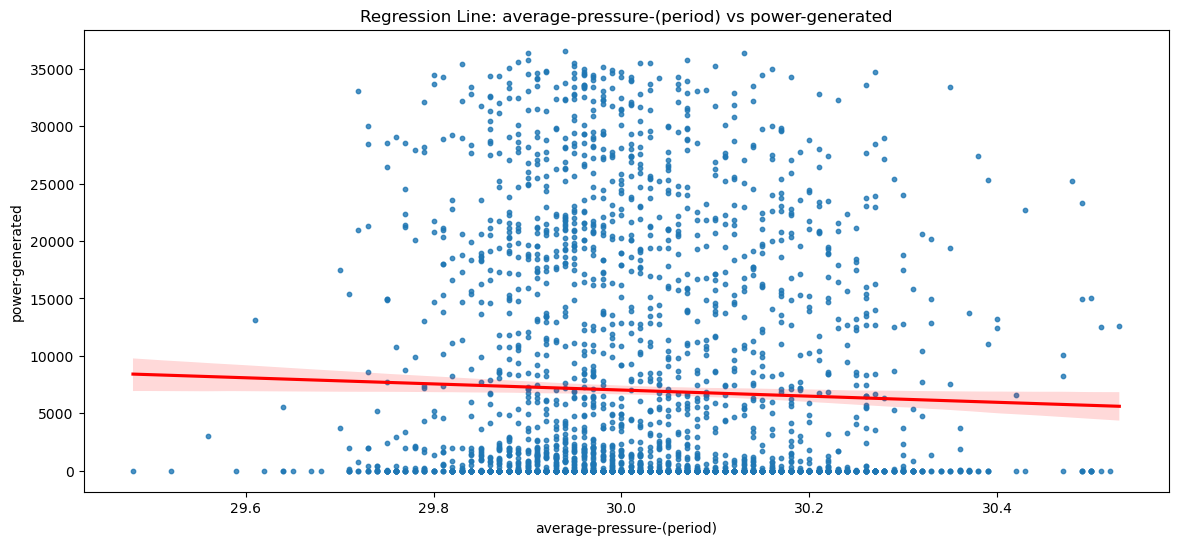

<Figure size 1400x600 with 0 Axes>

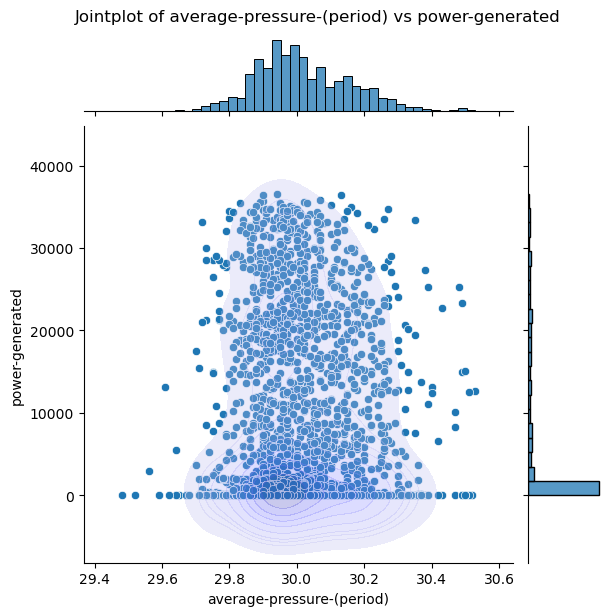

In [42]:
bivariate_analysis(df,'average-pressure-(period)')

## Data preprocessing

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data_clean = pd.DataFrame()
    vif_data_clean["feature"] = df.columns
    vif_data_clean["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data_clean

# Assuming 'x' is your DataFrame with independent variables
vif_df = calculate_vif(df)
print(vif_df)

                       feature         VIF
0       distance-to-solar-noon    9.755697
1                  temperature   88.265639
2               wind-direction   18.294923
3                   wind-speed   11.577729
4                    sky-cover    4.026166
5                   visibility   60.842166
6                     humidity   45.064045
7  average-wind-speed-(period)    6.098433
8    average-pressure-(period)  205.763511
9              power-generated    4.155422


In [44]:
# Apply log transformation
df['power-generated'] = np.log1p(df['power-generated'])

In [45]:
# Calculate Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Filter out outliers for each column, except 'sky-cover'
for column in df.columns:
    if column != 'sky-cover':
        # Ensure that the boolean Series is aligned with the DataFrame index
        df = df[~outliers[column]]

df=df.reset_index(drop=True)

print("Data after removing outliers:")
print(df.head())

Data after removing outliers:
   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.759640           69              28         7.5          0   
4                0.862113           72              29         6.8          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        49                          6.0   
4        10.0        67                          6.0   

   average-pressure-(period)  power-generated  
0                      29.82         0.000000  
1                      29.85         0.000000  
2 

C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\1037520020.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers[column]]
C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\1037520020.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers[column]]
C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\1037520020.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers[column]]
C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\1037520020.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers[column]]
C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\1037520020.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers[column]]
C:\Users\Nasreen RPX\AppData\Local\Temp\ipykernel_13420\1037520020.py:13: UserWarning: Boolean Series key

In [46]:
# Check for duplicate column names
print(df.columns.duplicated())


[False False False False False False False False False False]


In [47]:
vif_df = calculate_vif(df)
print(vif_df)

                       feature           VIF
0       distance-to-solar-noon      5.166133
1                  temperature      1.476371
2               wind-direction      1.225831
3                   wind-speed      1.772473
4                    sky-cover      1.358063
5                   visibility  88154.412581
6                     humidity      1.765736
7  average-wind-speed-(period)      1.916732
8    average-pressure-(period)      1.425314
9              power-generated      5.455623


In [48]:
# Drop the 'visibility' column
df = df.drop('visibility', axis=1)

In [49]:
df.skew()

distance-to-solar-noon         0.105560
temperature                   -0.113478
wind-direction                -1.222474
wind-speed                     0.162761
sky-cover                      0.190699
humidity                      -0.474823
average-wind-speed-(period)    0.334102
average-pressure-(period)      0.483839
power-generated               -0.002882
dtype: float64

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

data_encoded = ohe.fit_transform(df[["sky-cover"]])


data_encoded_df = pd.DataFrame(data_encoded.toarray(), columns=ohe.get_feature_names_out(["sky-cover"]))

df = df.join(data_encoded_df)
df = df.drop("sky-cover", axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ["distance-to-solar-noon", "temperature", "wind-direction",
                  "wind-speed", "humidity",
                  "average-wind-speed-(period)", "average-pressure-(period)",
                  "power-generated"]

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [52]:
# Define predictors (features) and target variable
X = df.drop('power-generated', axis=1)
y=df['power-generated']


#### Feature engineering enhances model accuracy by creating or transforming features to capture complex patterns. Standardizing ensures equal feature scales, improving model performance and convergence.

In [53]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

# Model Training and Hyperparameter Tuning
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

param_grids = {
    'Lasso': {'alpha': [0.01, 0.1, 1, 10]},
    'Ridge': {'alpha': [0.01, 0.1, 1, 10]}
}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R-squared: {r2}")

# Example Output
# Lasso R-squared: 0.83
# Ridge R-squared: 0.84



Lasso R-squared: 0.8216695533238764
Ridge R-squared: 0.8201094811945773


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Create Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Grid search for Gradient Boosting
grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# Predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the best parameters and the evaluation metrics
print(f'Best Gradient Boosting Parameters: {grid_search_gb.best_params_}')
print(f'Gradient Boosting R-squared: {r2}')
print(f'Gradient Boosting RMSE: {rmse}')
print(f"Random Forest (Randomized Search) Mean Squared Error: {mse:.4f}")
print(f'Gradient Boosting MAE: {mae}')
print(f'Best Gradient Boosting R-squared: {best_gb_model.score(X_test, y_test)}')


Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting R-squared: 0.9464104237769341
Gradient Boosting RMSE: 0.229030191796344
Random Forest (Randomized Search) Mean Squared Error: 0.0525
Gradient Boosting MAE: 0.1042526257327889
Best Gradient Boosting R-squared: 0.9464104237769341


C:\Users\Nasreen RPX\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,4],
    'random_state':[42]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create and evaluate models using Grid Search
models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

param_grids = {
    'RandomForest': param_grid_rf,
    'XGBoost': param_grid_xgb
}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluation
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} R-squared: {r2:.4f}")
    print(f"{model_name} Mean Squared Error: {mse:.4f}")
    print(f"{model_name} Root Mean Squared Error: {rmse:.4f}")
    print(f"{model_name} Mean Absolute Error: {mae:.4f}")
    print()

# Example of RandomizedSearchCV for more efficient hyperparameter search
random_search_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
    
print(f"Random Forest (Randomized Search) Best Parameters: {random_search_rf.best_params_}")
print(f"Random Forest (Randomized Search) R-squared: {r2_rf:.4f}")
print(f"Random Forest (Randomized Search) Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest (Randomized Search) Root Mean Squared Error: {rmse_rf:.4f}")
print(f"Random Forest (Randomized Search) Mean Absolute Error: {mae_rf:.4f}")


RandomForest Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
RandomForest R-squared: 0.9551
RandomForest Mean Squared Error: 0.0440
RandomForest Root Mean Squared Error: 0.2097
RandomForest Mean Absolute Error: 0.0879

XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
XGBoost R-squared: 0.9483
XGBoost Mean Squared Error: 0.0506
XGBoost Root Mean Squared Error: 0.2249
XGBoost Mean Absolute Error: 0.1046

Random Forest (Randomized Search) Best Parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}
Random Forest (Randomized Search) R-squared: 0.9551
Random Forest (Randomized Search) Mean Squared Error: 0.0440
Random Forest (Randomized Search) Root Mean Squared Error: 0.2097
Random Forest (Randomized Search) Mean Absolute Error: 0.0879


In [57]:
# Create XGBoost Regressor with the best parameters
rf_final_model = RandomForestRegressor(max_depth= None, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 200, random_state= 42)

# Train the model
rf_final_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, n_estimators=200, random_state=42)

In [58]:
# Create XGBoost Regressor with the best parameters
xg_final_model = xgb.XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8
)

# Train the model
xg_final_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

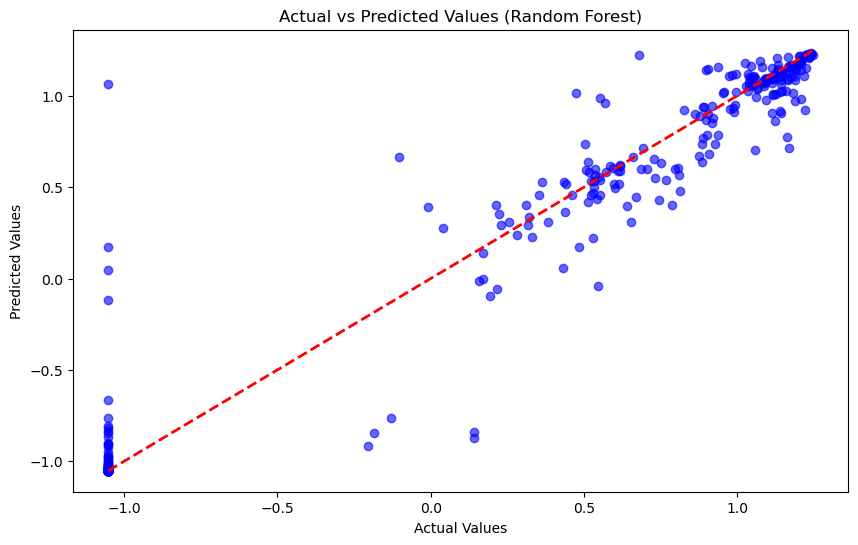

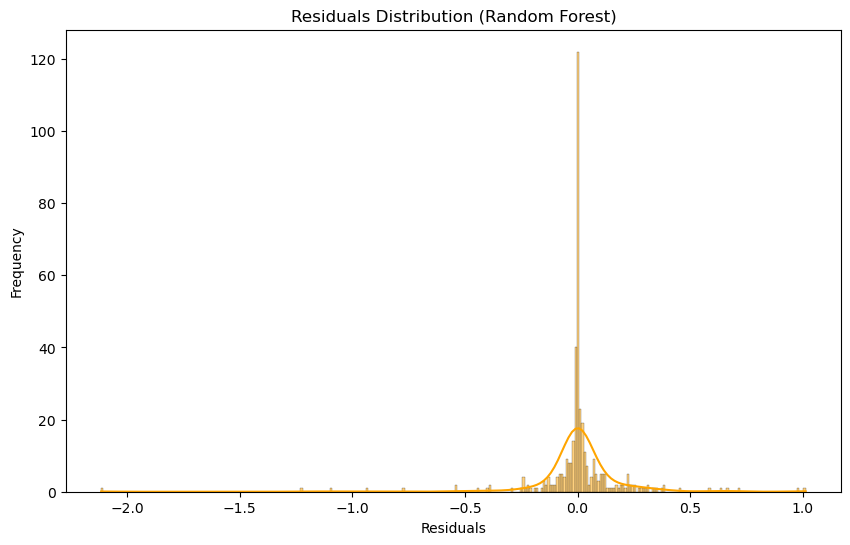

In [59]:
# Predictions
y_pred_rf = rf_final_model.predict(X_test)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Random Forest)')
plt.show()



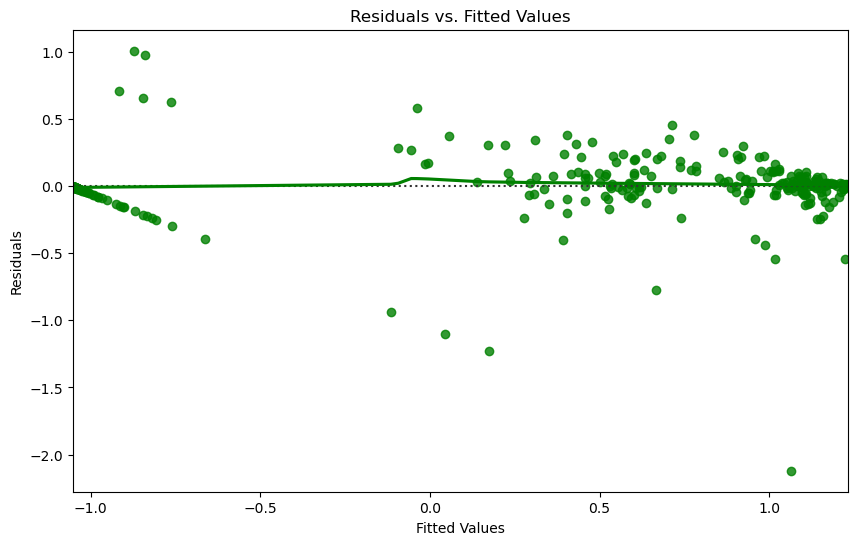

In [60]:
# Assuming you have already calculated the residuals
residuals = y_test - y_pred_rf

# Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals, lowess=True, color="g")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

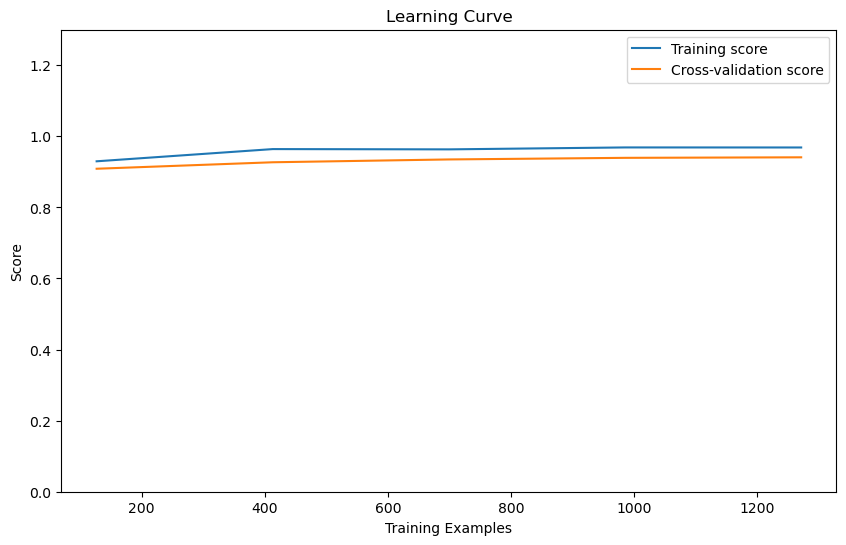

In [61]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(rf_final_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.ylim(0, 1.3)
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Define the models
models = {
    'RandomForest': rf_final_model,
    'XGBoost': xg_final_model
}

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function for cross-validation
def evaluate_model_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"{model.__class__.__name__} Cross-Validation R-squared:")
    print(f"Mean R-squared: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print("-" * 40)

# Evaluate each model with cross-validation
for name, model in models.items():
    evaluate_model_cv(model, X, y)

In [ ]:
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances - {model_name}')
    plt.show()

# Plot feature importance for models that support it
plot_feature_importance(rf_final_model, X.columns, "Random Forest")
plot_feature_importance(xg_final_model, X.columns, "XGBoost")


### Deployment

In [ ]:
import pickle
filename= 'Finalized_model.pkl'
pickle.dump(rf_final_model,open(filename,'wb'))

In [ ]:
df.columns

In [ ]:
df.describe().T